<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на 10 строк таблицы, для первичного анализа

In [ ]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


Теперь посмотрим на пропущенные значения

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как выяснилось в колонке TotalSpent есть несколько не числовых значений ' ', поэтому поменяем их на nan-ы

In [ ]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', np.nan)

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Теперь видно что в TotalSpent 9 пропущенных значений, заменим их на среднее значение в столбце и поменяем тип слобца на float

In [ ]:
data.TotalSpent = data.TotalSpent.fillna(data.TotalSpent.mode()[0]) 
data.TotalSpent = data.TotalSpent.astype(float)
data.TotalSpent

0       1026.35
1       1872.20
2         75.90
3       2570.00
4       6758.45
         ...   
5277      82.15
5278    2188.45
5279      55.05
5280    2215.25
5281    1375.60
Name: TotalSpent, Length: 5282, dtype: float64

In [ ]:
sum(data.isna().sum() == True)

0

In [ ]:
sum(data.isnull().sum()>0)

0

Как видно нет ни пропущенных значений ни nan-ов.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

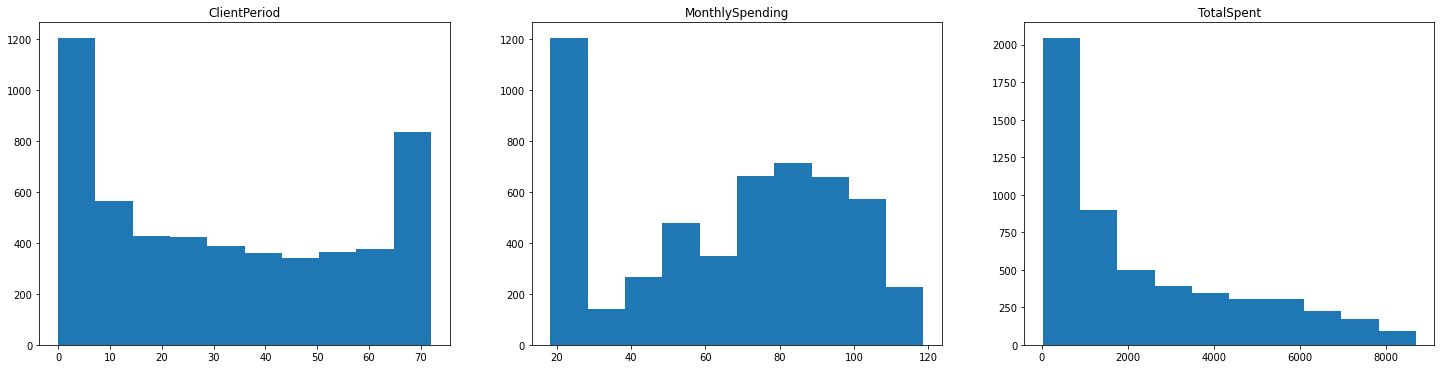

In [ ]:
#counts, bins = np.histogram(data['TotalSpent'])
#plt.hist(bins[:-1], bins, weights=counts)
#data['TotalSpent'].head()

plt.figure(figsize=(25,70))
for num, col in enumerate(num_cols):
    #print(col)
    counts, bins = np.histogram(data[col])
    plt.subplot(10,3,num + 1, title = col)
    plt.hist(bins[:-1], bins, weights=counts)


In [ ]:
for num, col in enumerate(data[cat_cols]):
    print(col)
    print(data[col].value_counts())
    print()

Sex
Male      2655
Female    2627
Name: Sex, dtype: int64

IsSeniorCitizen
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner
No     2705
Yes    2577
Name: HasPartner, dtype: int64

HasChild
No     3676
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Na

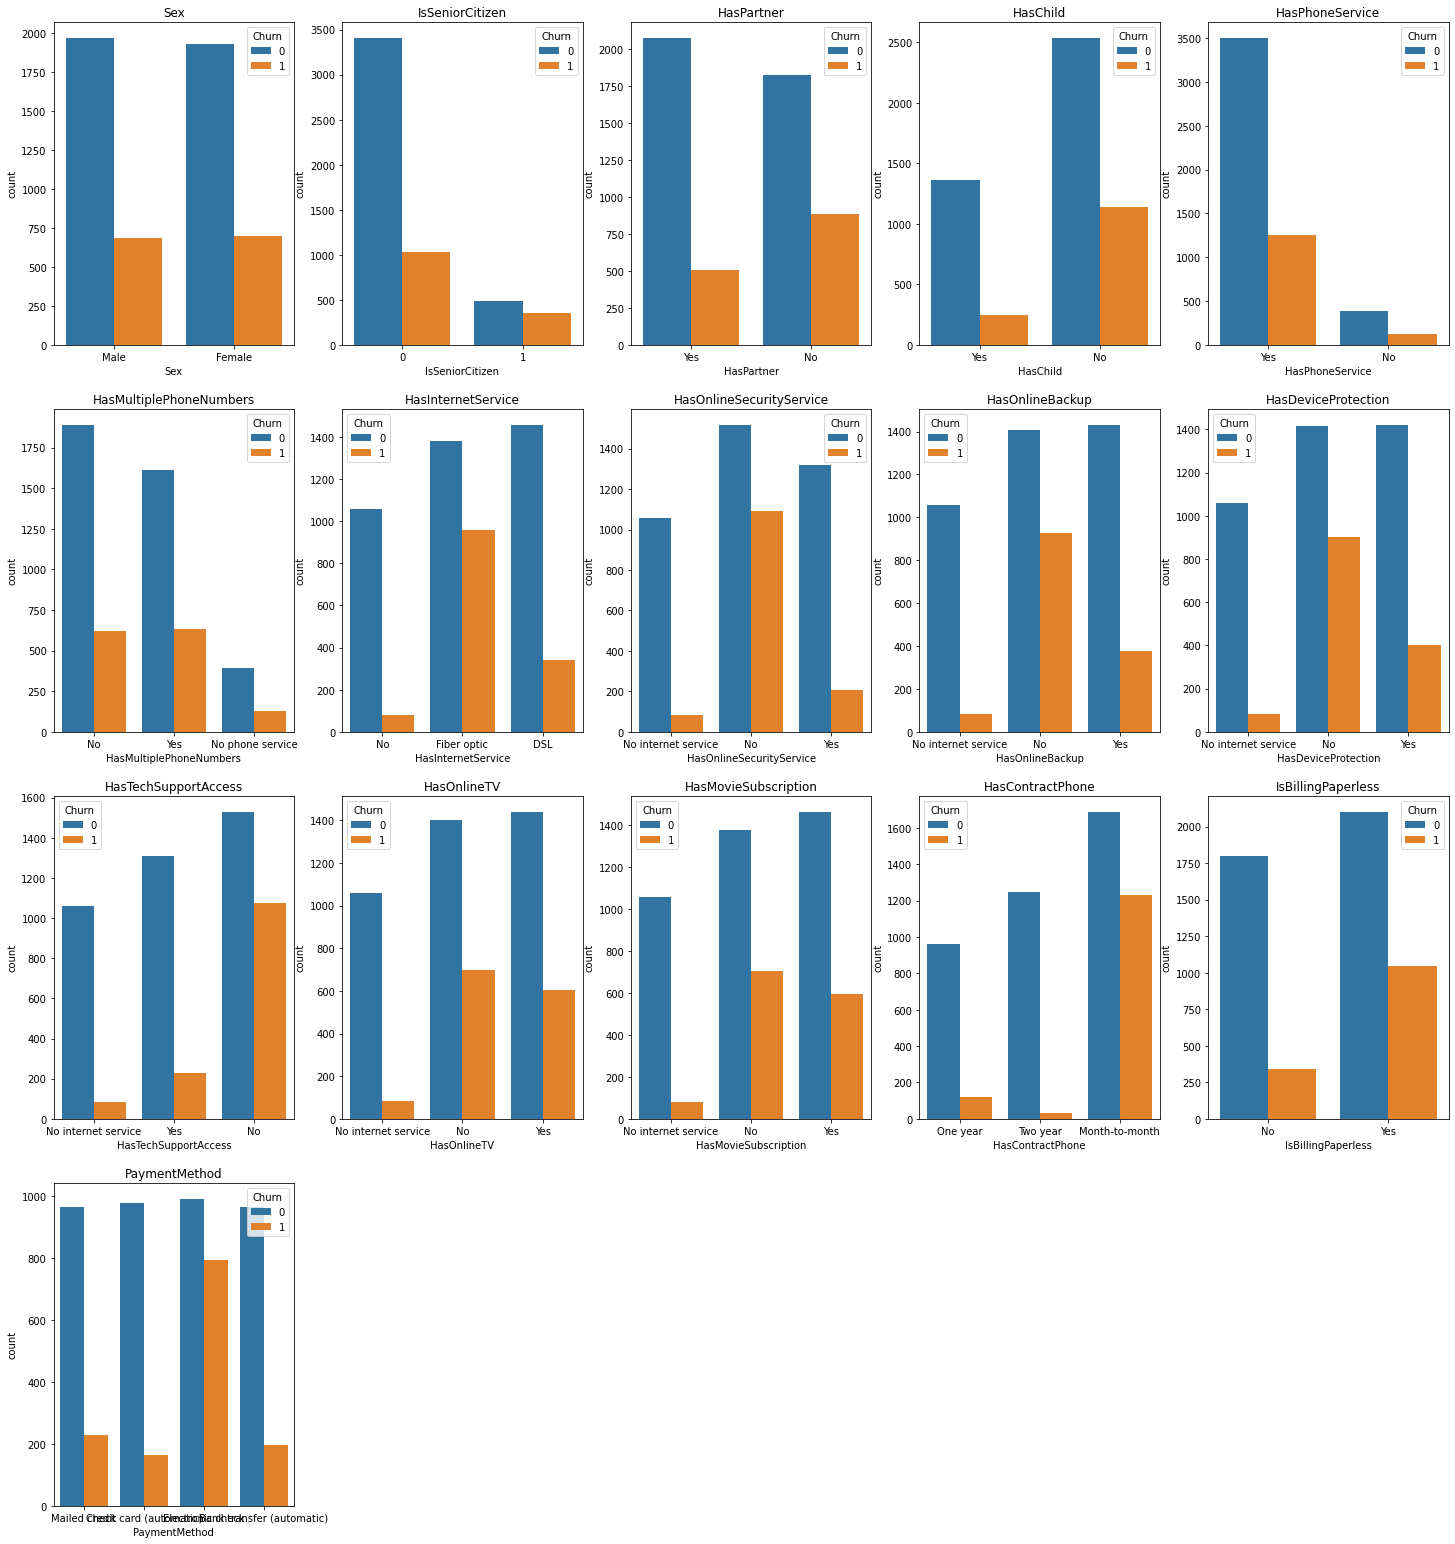

In [ ]:
plt.figure(figsize=(25,70))
for num, col in enumerate(data[cat_cols]):
    plt.subplot(10,5,num + 1, title = col)   
    sns.countplot(x= col, hue='Churn', data=data)

Распределение Churn нельзя назвать хорошо сбалансированным, но различие в численности небольшое, поэтому с этим можно работать.

0    3898
1    1384
Name: Churn, dtype: int64

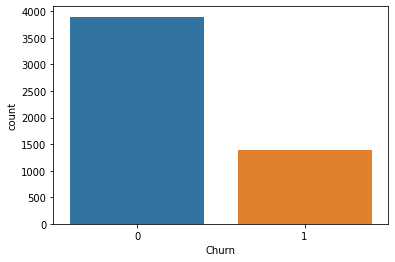

In [ ]:
sns.countplot(x= 'Churn', data=data)
data.Churn.value_counts()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Стандартизировать признаки мы будем в pipeline, а вот OneHotEncoder сделаем до.

In [ ]:
data2 = pd.get_dummies(data,drop_first=True, columns = cat_cols, prefix = cat_cols) 

In [ ]:
display(data.shape)
display(data2.shape)

(5282, 20)

(5282, 31)

In [ ]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

param_grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}

CV_model = GridSearchCV(pipe, 
                        param_grid,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        refit=True, 
                        verbose=2)




In [ ]:
x,y = data2.drop(columns = ['Churn'], axis = 1), data2['Churn']
CV_model.fit(x, y)
print(CV_model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'logisticregression__C': 100}


In [ ]:
CV_model.cv_results_

{'mean_fit_time': array([0.07590318, 0.07607446, 0.07493992, 0.05802431, 0.03981571,
        0.03043466]),
 'std_fit_time': array([0.0098675 , 0.01011344, 0.00993679, 0.00570598, 0.00108814,
        0.00492932]),
 'mean_score_time': array([0.00586982, 0.0056251 , 0.00685143, 0.00633688, 0.00729442,
        0.00528455]),
 'std_score_time': array([0.00027798, 0.00022361, 0.00242673, 0.00117418, 0.00241236,
        0.00088405]),
 'param_logisticregression__C': masked_array(data=[100, 10, 1, 0.1, 0.01, 0.001],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'logisticregression__C': 100},
  {'logisticregression__C': 10},
  {'logisticregression__C': 1},
  {'logisticregression__C': 0.1},
  {'logisticregression__C': 0.01},
  {'logisticregression__C': 0.001}],
 'split0_test_score': array([0.86225585, 0.862279  , 0.86218643, 0.86048783, 0.85661853,
        0.85130982]),
 'split1_test_score': array([0.83696196, 0.8369

In [ ]:
CV_model.best_score_

0.8451185770085615

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Наилучшим оказалось качество, равное 0.8451 при C = 100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.2 MB/s eta 0:00:00


#Без GridSearch 

In [ ]:
import catboost

In [ ]:
x,y = data.drop(columns = ['Churn'], axis = 1), data['Churn']
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols)

boosting_model.fit(X_train, y_train)
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

Learning rate set to 0.044164
0:	learn: 0.6629852	total: 32ms	remaining: 12.8s
1:	learn: 0.6376208	total: 74.5ms	remaining: 14.8s
2:	learn: 0.6128981	total: 123ms	remaining: 16.2s
3:	learn: 0.5913703	total: 154ms	remaining: 15.2s
4:	learn: 0.5728594	total: 189ms	remaining: 14.9s
5:	learn: 0.5566482	total: 236ms	remaining: 15.5s
6:	learn: 0.5421314	total: 271ms	remaining: 15.2s
7:	learn: 0.5311521	total: 290ms	remaining: 14.2s
8:	learn: 0.5192495	total: 322ms	remaining: 14s
9:	learn: 0.5083003	total: 343ms	remaining: 13.4s
10:	learn: 0.4992335	total: 379ms	remaining: 13.4s
11:	learn: 0.4910395	total: 410ms	remaining: 13.2s
12:	learn: 0.4838428	total: 450ms	remaining: 13.4s
13:	learn: 0.4774441	total: 478ms	remaining: 13.2s
14:	learn: 0.4710375	total: 496ms	remaining: 12.7s
15:	learn: 0.4652450	total: 513ms	remaining: 12.3s
16:	learn: 0.4594138	total: 530ms	remaining: 11.9s
17:	learn: 0.4543157	total: 562ms	remaining: 11.9s
18:	learn: 0.4497975	total: 606ms	remaining: 12.2s
19:	learn: 0.

#C GridSearch 

In [ ]:
param_grid =  {'learning_rate': [100, 10, 1, 0.1, 0.01, 0.001],
               'n_estimators' : [50, 100, 200, 400]}

grid_boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols)
boost_CV_model = GridSearchCV(grid_boosting_model, 
                        param_grid,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        refit=True, 
                        verbose=2)

boost_CV_model.fit(x,y)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
0:	learn: 0.6580855	total: 7.43ms	remaining: 736ms
1:	learn: 0.6274458	total: 15.1ms	remaining: 738ms
2:	learn: 0.6015138	total: 21.6ms	remaining: 698ms
3:	learn: 0.5810987	total: 28.8ms	remaining: 692ms
4:	learn: 0.5621377	total: 35.5ms	remaining: 674ms
5:	learn: 0.5465184	total: 41.6ms	remaining: 652ms
6:	learn: 0.5324931	total: 48.6ms	remaining: 646ms
7:	learn: 0.5205040	total: 55.4ms	remaining: 637ms
8:	learn: 0.5089894	total: 69.9ms	remaining: 707ms
9:	learn: 0.4985770	total: 80.5ms	remaining: 725ms
10:	learn: 0.4889069	total: 87ms	remaining: 704ms
11:	learn: 0.4811234	total: 93.5ms	remaining: 686ms
12:	learn: 0.4741346	total: 100ms	remaining: 669ms
13:	learn: 0.4683296	total: 107ms	remaining: 654ms
14:	learn: 0.4624193	total: 113ms	remaining: 642ms
15:	learn: 0.4577555	total: 120ms	remaining: 629ms
16:	learn: 0.4535265	total: 127ms	remaining: 619ms
17:	learn: 0.4495801	total: 133ms	remaining: 606ms
18:	learn: 0.4453322

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7feccb0603a0>,
             n_jobs=-1,
             param_grid={'learning_rate': [100, 10, 1, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='roc_auc', verbose=2)

In [ ]:
print(boost_CV_model.best_params_)
print(boost_CV_model.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100}
0.8465008127746076


In [ ]:
param_grid =  {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
               'n_estimators' : [50, 100, 200, 400]}

grid_boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols)
boost_CV_model = GridSearchCV(grid_boosting_model, 
                        param_grid,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        refit=True, 
                        verbose=2)

boost_CV_model.fit(x,y)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
0:	learn: 0.6580855	total: 7.41ms	remaining: 734ms
1:	learn: 0.6274458	total: 14.1ms	remaining: 693ms
2:	learn: 0.6015138	total: 19.9ms	remaining: 644ms
3:	learn: 0.5810987	total: 26.7ms	remaining: 641ms
4:	learn: 0.5621377	total: 33.2ms	remaining: 631ms
5:	learn: 0.5465184	total: 39.7ms	remaining: 622ms
6:	learn: 0.5324931	total: 45.8ms	remaining: 609ms
7:	learn: 0.5205040	total: 51.7ms	remaining: 594ms
8:	learn: 0.5089894	total: 57.6ms	remaining: 583ms
9:	learn: 0.4985770	total: 64.1ms	remaining: 577ms
10:	learn: 0.4889069	total: 70.4ms	remaining: 570ms
11:	learn: 0.4811234	total: 77.3ms	remaining: 567ms
12:	learn: 0.4741346	total: 83.4ms	remaining: 558ms
13:	learn: 0.4683296	total: 89.5ms	remaining: 550ms
14:	learn: 0.4624193	total: 95.5ms	remaining: 541ms
15:	learn: 0.4577555	total: 101ms	remaining: 533ms
16:	learn: 0.4535265	total: 108ms	remaining: 526ms
17:	learn: 0.4495801	total: 116ms	remaining: 527ms
18:	learn: 0.44

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7feccb01e130>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='roc_auc', verbose=2)

In [ ]:
print(boost_CV_model.best_params_)
print(boost_CV_model.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100}
0.8465008127746076


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Наилучшее **- 0.8465008127746076** 


с n_estimators = 100 и learning_rate = 0.1

# Предсказания

In [ ]:
best_model = catboost.CatBoostClassifier(n_estimators=100, 
                                             learning_rate = 0.1, 
                                             cat_features=cat_cols)
best_model.fit(x,y)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1] #/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index = False)


In [ ]:
submission

,Id,Churn
0,0,0.046174
1,1,0.716060
2,2,0.682152
3,3,0.013463
4,4,0.009528
...,...,...
1756,1756,0.120182
1757,1757,0.015946
1758,1758,0.826912
1759,1759,0.532669


In [ ]:
submission = pd.read_csv('./submission.csv')
submission

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5


# Kaggle (5 баллов) Для 2023 года это делается автоматически, так что это для истории

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

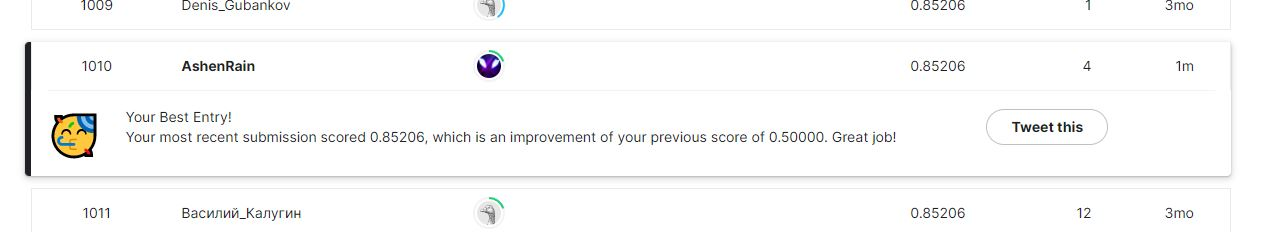
AshenRain - 0.85206

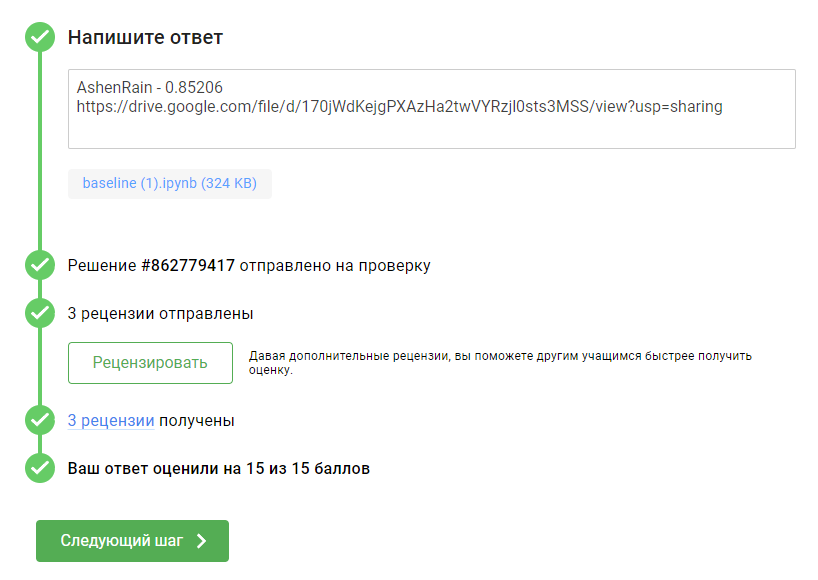